Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-3-c40f0ef468dd>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])


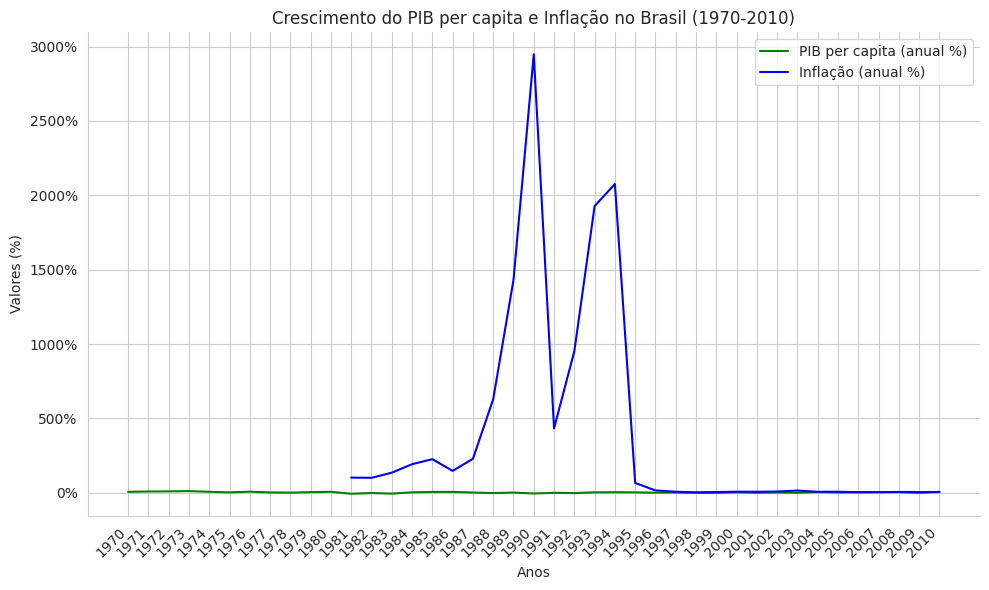

In [3]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def mount_drive():
    drive.mount('/content/gdrive')

def load_data(path, dataset):
    try:
        df = pd.read_csv(path + dataset, sep=';', decimal=',')
        return df
    except FileNotFoundError:
        raise FileNotFoundError(f"Arquivo não encontrado na pasta. {path + dataset}")

def analyze_data(df, indicator, country_code, years):
    columns = ['Country Code'] + years
    filtered_data = df[df['Indicator Name'].str.contains(indicator)][columns]
    filtered_data = filtered_data[filtered_data['Country Code'] == country_code]

    if filtered_data.empty:
        raise ValueError("Nenhum dado encontrado para os critérios especificados.")

    return filtered_data[years]

def plot_graph(data1, data2, label1, label2, years):
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    plt.plot(years, data1.values[0], label=label1, linestyle='-', color='green')  # Linha contínua verde para o PIB per capita
    plt.plot(years, data2.values[0], label=label2, linestyle='-', color='blue')   # Linha contínua azul para a inflação
    plt.xlabel('Anos')
    plt.ylabel('Valores (%)')
    plt.title('Crescimento do PIB per capita e Inflação no Brasil (1970-2010)')
    plt.legend()
    plt.xticks(rotation=45, ha="right")
    plt.gca().set_yticklabels(['{:.0f}%'.format(y) for y in plt.gca().get_yticks()])
    plt.tight_layout()
    sns.despine()
    plt.show()

# Configurações
path = '/content/gdrive/MyDrive/'
dataset = 'wdi_paises_america_sul_series_validas.csv'
years = [str(year) for year in range(1970, 2011)]

# Montar o Google Drive
mount_drive()

# Carregar o conjunto de dados
df = load_data(path, dataset)

# Analisar os dados para o crescimento do PIB per capita e a inflação no Brasil
try:
    gdp_data = analyze_data(df, 'GDP per capita growth', 'BRA', years)
    inflation_data = analyze_data(df, 'Inflation, consumer prices', 'BRA', years)

    # Plotar o gráfico de correlação
    plot_graph(gdp_data, inflation_data, 'PIB per capita (anual %)', 'Inflação (anual %)', years)

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")

